# Team Members:

Jetendra Mulinti, Goutham Vemula, Prajeeth Nakka

# Introduction: We are creating 6 ML models & pick one ML model which predicts the dropout_cnt.

Steps we are following
1. Loading data
2. Cleaning data
3. EDA
4. Feature selection
5. Train the model with 6 Models
6. Validating Metrics.
7. Selecting Models
8. Conclusion

In [1]:
### Import packages

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
from datetime import datetime

### sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

###### Standardization of the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_poisson_deviance, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import glm

from sklearn.metrics import mean_squared_error


# Data Loading

In [2]:
github_url = 'https://raw.githubusercontent.com/JetendraMulinti/DAV-6150---DataScience/main/Project%201%20Implementing%20and%20Evaluating%20a%20Series%20of%20Regression%20Models/Project1_Data.csv'

NY_df = pd.read_csv(github_url)
NY_df.head(2)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%


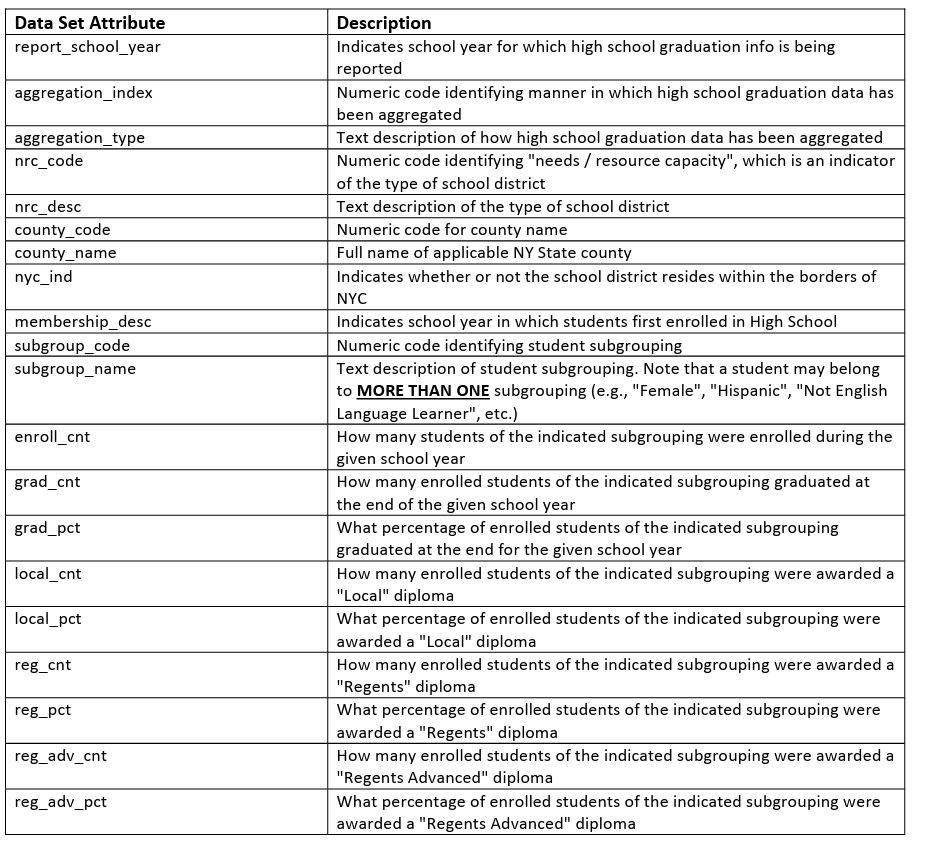

In [3]:
from IPython.display import Image
Image(filename='D:\JITHU\Yeshiva - USA\Academics\Spring - 2024\DATA SCIENCE\DAV 6150 - DataScience\Project 1 Implementing and Evaluating a Series of Regression Models\DataDictionary_1.png')


In [ ]:
from IPython.display import Image
Image(filename='D:\JITHU\Yeshiva - USA\Academics\Spring - 2024\DATA SCIENCE\DAV 6150 - DataScience\Project 1 Implementing and Evaluating a Series of Regression Models\DataDictionary_2.png')


# Data Cleaning

In [ ]:
#### upon oberserving the data in excel we found some rows are having '-' so planning to remove them

print("No of rows with -'s instead of data: ",len(NY_df[NY_df['enroll_cnt'] == '-']))
print(" % of missing data: ",len(NY_df[NY_df['enroll_cnt'] == '-']) / len(NY_df) * 100)

##### removing that data
NY_df = NY_df[NY_df['enroll_cnt'] != '-'].reset_index(drop=True)

print("Post cleaning of data: ",len(NY_df))

In [ ]:
print("Shape of the data: ", NY_df.shape)

In [ ]:
NY_df.info()

In [ ]:
####### Converting Data Types as per data

def convert_column_data_types(df):
    
    # Convert 'cnt' columns to int and 'pct' columns to float before that remove % symbol
    for column in df.columns:
        if column.endswith('cnt'):
            df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)
        elif column.endswith('pct'):
            df[column] = df[column].str.replace('%', '').astype(float)
    
    # Convert specific columns based on the suggested data types
    specific_columns = {
        'report_school_year': 'object',
        'aggregation_index': 'int64',
        'aggregation_type': 'object',
        'nrc_code': 'int64',
        'nrc_desc': 'object',
        'county_code': 'int64',
        'county_name': 'object',
        'nyc_ind': 'bool',
        'membership_desc': 'object',
        'subgroup_code': 'int64',
        'subgroup_name': 'object'
    }
    
    for column, dtype in specific_columns.items():
        if column in df.columns:
            if dtype == 'bool':
                df[column] = df[column].astype(bool)
            else:
                df[column] = df[column].astype(dtype)
    
    return df


In [ ]:
### Calling functions to change the data types

NY_df =convert_column_data_types(NY_df)

NY_df.head()

In [ ]:
NY_df.info()

# EDA

In [ ]:
## Sitation: Help from chatgpt
###### Creating a function that gives univariate analysis on quantitative columns


def Hist_BoxPlotFunction(df, pdf_filename):

    # Path for saving the PDF in the current working directory
    pdf_path = os.path.join(os.getcwd(), pdf_filename)
    
    quantitative_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns
    
    with PdfPages(pdf_path) as pdf:
        for col in quantitative_columns:
            fig, axs = plt.subplots(1, 2, figsize=(12, 4))
            
            # Histogram
            sns.histplot(df[col], ax=axs[0], kde=True)
            axs[0].set_title(f'Histogram of {col}')
            
            # Box Plot
            sns.boxplot(x=df[col], ax=axs[1])
            axs[1].set_title(f'Box Plot of {col}')
            
            plt.tight_layout()
            pdf.savefig(fig)  # Save the figure into the PDF
            plt.show()  # Display the plot
            plt.close(fig)  # Close to free up memory

In [ ]:
Hist_BoxPlotFunction(NY_df,'Quant_visuals.pdf')

## Observations

1. Distribution shapes vary, with right-skewness in enrollment and graduation counts, indicating many small values and fewer large values.
2. County and subgroup codes show multi-modal distributions, suggesting diverse representation across multiple categories.
3. Graduation-related percentages are left-skewed, most schools have high success rates, while dropout rates are low but varied.
4. Outliers are present in most distributions, indicating extreme values that could be special cases or data entry errors.
5. The data might require transformation for certain statistical analyses or predictive modeling due to skewness and outliers.

In [ ]:
#### Capping (For Notmally distributed data)
#### We considered lower_percentile, upper_percentile as default values. 

def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    """
    Caps outliers in a pandas series to specified percentile thresholds.
    """
    quantiles = series.quantile([lower_percentile, upper_percentile])
    series_capped = series.clip(quantiles[lower_percentile], quantiles[upper_percentile])
    return series_capped


CappingColumns = NY_df.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()


# Applying the function to cap outliers in the dataset
for column in CappingColumns:
    NY_df[column] = cap_outliers(NY_df[column])
    
NY_df.head(2)

In [ ]:
sum_df = pd.DataFrame(NY_df[['enroll_cnt','grad_cnt','local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt',
     'still_enr_cnt','ged_cnt','dropout_cnt']].sum(), columns=['sum']).reset_index()

sum_df = sum_df.sort_values(by='sum', ascending=False)
sum_df['Percent'] = round((sum_df['sum'] / sum_df[sum_df['index'] == 'enroll_cnt']['sum'].sum()) * 100)
sum_df

Students obtaining regular (42%) and advanced Regents diplomas (34%), while dropout (7%) and GED attainment (1%) are relatively low.

Here we want to compare the dropouts & grad by category wise, so instead of using plots we are grouping by only for better understanding

In [ ]:
def calculate_percentages_and_sort(df, group_by_column, sort_by_column, ascending=False):
    
    temp_df = df.groupby(group_by_column)['enroll_cnt','grad_cnt','dropout_cnt',
                                         'local_cnt','reg_cnt','reg_adv_cnt','non_diploma_credential_cnt',
                                         'still_enr_cnt','ged_cnt'].sum().reset_index()
    ### This is column lvl Pct
    temp_df['enroll_pct col-lvl %'] = round((temp_df['enroll_cnt'] / temp_df['enroll_cnt'].sum()) * 100, 2)
    
    ### this is Row lvl Pct
    temp_df['grad_pct %'] = ((temp_df['grad_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['dropout_pct %'] = ((temp_df['dropout_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['local_pct %'] = ((temp_df['local_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['reg_pct %'] = ((temp_df['reg_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['reg_adv_pct %'] = ((temp_df['reg_adv_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['non_diploma_credential_cnt_pct %'] = ((temp_df['non_diploma_credential_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['still_enr_pct %'] = ((temp_df['still_enr_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)
    temp_df['ged_cnt %'] = ((temp_df['ged_cnt'] / temp_df['enroll_cnt']) * 100).astype(int)

    ## ordering columns
    temp_df = temp_df[[group_by_column,'enroll_cnt','enroll_pct col-lvl %','grad_pct %','dropout_pct %','local_pct %',
                       'reg_pct %','reg_adv_pct %','non_diploma_credential_cnt_pct %','still_enr_pct %','ged_cnt %']]

    
    temp_df = temp_df.sort_values(by=[sort_by_column], ascending=ascending).reset_index(drop=True)
    return temp_df


In [ ]:
### County_name wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='county_name', sort_by_column='dropout_pct %', ascending=False)

In [ ]:
### County_name wise 
calculate_percentages_and_sort(NY_df, group_by_column='county_name', sort_by_column='grad_pct %', ascending=False)

1. Dropout Rates Insight: It tells counties sorted by 'dropout_pct' in descending order, revealing that Montgomery has the highest reported dropout rate.

2. Graduation Rates Insight: It tells counties by 'grad_pct' in descending order, highlighting that Putnam not only has the highest graduation rate but also one of the lowest dropout rates.

3. Data Spread Observation: The data provided spans a diverse range of dropout and graduation percentages across different counties, which can be critical for identifying factors influencing these metrics.

# nrc_desc

In [ ]:
### nrc_desc wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nrc_desc', sort_by_column='dropout_pct %', ascending=False)

In [ ]:
### nrc_desc wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nrc_desc', sort_by_column='grad_pct %', ascending=False)

1. "Urban-Suburban High Needs" areas show a notable combination of high dropout rates (12%) and lower graduation rates (75%) compared to other areas.
2. "Low Needs" areas display the highest graduation rates (94%) and the lowest dropout rates (1%), indicating a strong performance in these regions.
3. There is a clear contrast in educational outcomes based on the need level of the area, with "High Needs" areas struggling more with dropouts and lower graduation rates.

# subgroup_name

In [ ]:
### subgroup_name wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='subgroup_name', sort_by_column='dropout_pct %', ascending=False)

In [ ]:
### subgroup_name wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='subgroup_name', sort_by_column='grad_pct %', ascending=False)

1. The group "Migrant" shows the lowest enrollment percentage but has a high dropout rate, suggesting targeted interventions could be needed.
2. "Students with Disabilities" have the lowest graduation rate and a high dropout rate, indicating potential areas for support and resource allocation.
3. "Not Economically Disadvantaged" and "White" subgroups have among the highest graduation rates, suggesting socioeconomic factors may influence educational outcomes significantly.

# aggregation_name

In [ ]:
### aggregation_name wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='aggregation_name', sort_by_column='dropout_pct %', ascending=False)

In [ ]:
### aggregation_name wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='aggregation_name', sort_by_column='grad_pct %', ascending=False)

1. The George Junior Republic Union Free School District has the highest dropout rate at 42%, indicating a potential area for intervention and support.
2. The Blind Brook-Rye Union Free School District and Scarsdale Union Free School District are tied for the highest graduation rate at 99%, showcasing exemplary educational outcomes.
3. Mount Pleasant-Cottage Union Free School District stands out with a low graduation rate of 20% and a high dropout rate of 33%, suggesting critical educational challenges.

# nyc_ind

In [ ]:
### nyc_ind wise (dropout_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nyc_ind', sort_by_column='dropout_pct %', ascending=False)

In [ ]:
### nyc_ind wise (grad_pct%)
calculate_percentages_and_sort(NY_df, group_by_column='nyc_ind', sort_by_column='grad_pct %', ascending=False)

1. NYC schools have a lower graduation rate (79%) and higher dropout rate (11%) compared to non-NYC schools.
2. Non-NYC schools perform better with a higher graduation rate (87%) and a lower dropout rate (5%).

## Summaring the above EDA insights:
    
1. Educational outcomes vary notably by region, with NYC schools facing lower graduation and higher dropout rates compared to non-NYC schools, and "Urban-Suburban High Needs" areas also showing challenges.

2. Specific districts such as George Junior Republic and Mount Pleasant-Cottage demonstrate extreme educational challenges, with very high dropout rates, while others like Blind Brook-Rye and Scarsdale showcase exceptional graduation outcomes.

3. Student demographics, such as migrants and those with disabilities, indicate a need for targeted intervention, while socioeconomic factors appear to have a significant influence on graduation rates.

# Feature selection

In [ ]:
####### I am using correlation matrix for identifying independent columns to dependent columns

def plot_correlation_matrix(df, columns):

    # Select the desired columns from the DataFrame
    selected_df = df[columns]

    # Calculate the correlation matrix
    corr_matrix = selected_df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 15))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    # Set the x-axis and y-axis labels to the selected columns
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.xlabel("Columns")
    plt.ylabel("Columns")

    plt.show()

Here we are removing Percentage columns as it is similar to count column

In [ ]:
columns_to_analyze = ['nrc_code', 'county_code', "nyc_ind",'subgroup_code','enroll_cnt', 'grad_cnt', 'local_cnt',
       'reg_cnt', 'reg_adv_cnt',
       'non_diploma_credential_cnt',
       'still_enr_cnt', 'ged_cnt', 'dropout_cnt']
plot_correlation_matrix(NY_df, columns_to_analyze)

1. There is a strong negative correlation between NYC indicator (nyc_ind) and dropout count (dropout_cnt), suggesting that being in NYC is inversely related to dropout rates.
2. Enrollment count (enroll_cnt) and graduation count (grad_cnt) are highly positively correlated with one another, indicating that as enrollment increases, graduation counts tend to increase as well.
3. There is also a significant negative correlation between local diploma count (local_cnt) and dropout count (dropout_cnt), which could imply that higher achievement in local diplomas is associated with lower dropout rates.

Considering the above correlation matrix & multicollinearity concept we are picking

1. grad_cnt
2. local_cnt
3. reg_cnt
4. still_enr_cnt
5. ged_cnt
6. nyc_ind

We are avoiding the normalization as we have the count data.

# Poisson Models

In [ ]:


# Define two different subsets of features for each model
features_model_1 = ['local_cnt', 'still_enr_cnt','grad_cnt',]
features_model_2 = [ 'reg_cnt', 'ged_cnt','nyc_ind']
target = 'dropout_cnt'

# Split the data into training and testing sets (70% train, 30% test) for both models
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    NY_df[features_model_1], NY_df[target], test_size=0.3, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    NY_df[features_model_2], NY_df[target], test_size=0.3, random_state=42)

# Create and train Poisson regression model 1
poisson_model_1 = PoissonRegressor()
poisson_model_1.fit(X_train_1, y_train_1)

# Create and train Poisson regression model 2
poisson_model_2 = PoissonRegressor()
poisson_model_2.fit(X_train_2, y_train_2)

# Predicting the dropout counts using the test set for both models
y_pred_model_1 = poisson_model_1.predict(X_test_1)
y_pred_model_2 = poisson_model_2.predict(X_test_2)

# Calculating the mean Poisson deviance for both models
mpd_model_1 = mean_poisson_deviance(y_test_1, y_pred_model_1)
mpd_model_2 = mean_poisson_deviance(y_test_2, y_pred_model_2)

# Calculating the mean squared error for both models
mse_model_1 = mean_squared_error(y_test_1, y_pred_model_1)
mse_model_2 = mean_squared_error(y_test_2, y_pred_model_2)

# Calculating the R^2 score for both models
r2_model_1 = r2_score(y_test_1, y_pred_model_1)
r2_model_2 = r2_score(y_test_2, y_pred_model_2)

# Printing out the evaluation metrics for both models
print(f'Poisson Model 1 - Mean Poisson Deviance: {mpd_model_1}, Mean Squared Error: {mse_model_1}, R^2 Score: {r2_model_1}')
print(f'Poisson Model 2 - Mean Poisson Deviance: {mpd_model_2}, Mean Squared Error: {mse_model_2}, R^2 Score: {r2_model_2}')


Mean Poisson Deviance measures the goodness of fit of the model. A lower mean Poisson deviance indicates a better fit to the data. Model 1 has a lower mean Poisson deviance, which is better.

Mean Squared Error (MSE) is the average of the squares of the errors between the predicted and actual values. A lower MSE indicates a more accurate model. Model 1 has a lower MSE, which is better.

R² Score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² Score closer to 1 indicates a model that explains a higher proportion of the variance. Model 1 has a higher R² Score, which is better.

Model 1 is the better model as it has a lower Mean Poisson Deviance, a lower Mean Squared Error, and a higher R² Score compared to Model 2. This suggests that Model 1 fits the data better and has a higher predictive accuracy.

# Negative binomial regression models

In [ ]:


# Define the two different subsets of features for each model as formulas
formula_glm_model_1 = 'dropout_cnt ~ enroll_cnt + local_cnt + still_enr_cnt'
formula_glm_model_2 = 'dropout_cnt ~ reg_cnt + ged_cnt'

# Split the data into training and testing sets (70% train, 30% test) for both models
train_data, test_data = train_test_split(NY_df, test_size=0.3, random_state=42)

# Define and fit the models
glm_model_1 = glm(formula_glm_model_1, data=train_data, family=sm.families.NegativeBinomial()).fit()
glm_model_2 = glm(formula_glm_model_2, data=train_data, family=sm.families.NegativeBinomial()).fit()

# Make predictions on the test data
y_pred_glm_model_1 = glm_model_1.predict(test_data)
y_pred_glm_model_2 = glm_model_2.predict(test_data)




# Calculating the mean squared error for both models
mse_model_1 = mean_squared_error(y_test_1, y_pred_glm_model_1)
mse_model_2 = mean_squared_error(y_test_2, y_pred_glm_model_2)

# Calculating the R^2 score for both models
r2_model_1 = r2_score(y_test_1, y_pred_glm_model_1)
r2_model_2 = r2_score(y_test_2, y_pred_glm_model_2)

# Printing out the evaluation metrics for both models
print(f'NegativeBinomial Model 1 -  Mean Squared Error: {mse_model_1}, R^2 Score: {r2_model_1}')
print(f'NegativeBinomial Model 2 -  Mean Squared Error: {mse_model_2}, R^2 Score: {r2_model_2}')

# Multiple linear regression

In [ ]:

# Define two different subsets of features for each model
features_model_1 = ['local_cnt', 'still_enr_cnt', 'grad_cnt']
features_model_2 = ['reg_cnt', 'ged_cnt', 'nyc_ind','enroll_cnt']
target = 'dropout_cnt'

# Split the data into training and testing sets (70% train, 30% test) for both models
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    NY_df[features_model_1], NY_df[target], test_size=0.3, random_state=42)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    NY_df[features_model_2], NY_df[target], test_size=0.3, random_state=42)

# Create and train multiple linear regression models
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train_1, y_train_1)

linear_model_2 = LinearRegression()
linear_model_2.fit(X_train_2, y_train_2)

# Predicting dropout counts using the test set for both models
y_pred_model_1 = linear_model_1.predict(X_test_1)
y_pred_model_2 = linear_model_2.predict(X_test_2)

# Calculating the mean squared error for both models
mse_model_1 = mean_squared_error(y_test_1, y_pred_model_1)
mse_model_2 = mean_squared_error(y_test_2, y_pred_model_2)

# Calculating the R-squared score for both models
r2_model_1 = r2_score(y_test_1, y_pred_model_1)
r2_model_2 = r2_score(y_test_2, y_pred_model_2)

# Printing out the evaluation metrics for both models
print(f'Linear Regression Model 1 (Features: {features_model_1})')
print(f'\tMean Squared Error: {mse_model_1}')
print(f'\tR^2 Score: {r2_model_1}')

print(f'\nLinear Regression Model 2 (Features: {features_model_2})')
print(f'\tMean Squared Error: {mse_model_2}')
print(f'\tR^2 Score: {r2_model_2}')

## Conclusion:
By comparing the 6 different models (2 Poisson, 2 negative binomial & 2 linear Regression models), R2 scores of  Linear Regression Model 1 is best suited for the business problem as it has High R2 Score.